In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [90]:
df=pd.read_csv("customer.csv")

In [91]:
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        50 non-null     int64 
 1   gender     50 non-null     object
 2   review     50 non-null     object
 3   education  50 non-null     object
 4   purchased  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [93]:
df.describe()

,age
count,50.000000
mean,54.160000
std,25.658161
min,15.000000
25%,30.250000
50%,57.000000
75%,74.000000
max,98.000000


In [94]:
df.isnull().sum()

age          0
gender       0
review       0
education    0
purchased    0
dtype: int64

In [95]:
df.duplicated().sum()

1

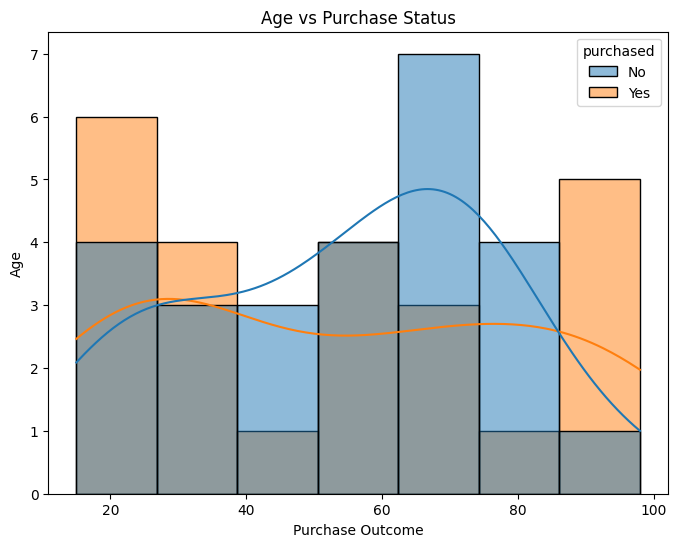

In [96]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', hue='purchased', kde=True)
plt.title('Age vs Purchase Status')
plt.xlabel('Purchase Outcome')
plt.ylabel('Age')
plt.show()

In [97]:
#ENCODING

In [98]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['purchased']=le.fit_transform(df['purchased'])
df['purchased']=df['purchased'].astype(int)
df.head(7)

,age,gender,review,education,purchased
0,30,Female,Average,School,0
1,68,Female,Poor,UG,0
2,70,Female,Good,PG,0
3,72,Female,Good,PG,0
4,16,Female,Average,UG,0
5,31,Female,Average,School,1
6,18,Male,Good,School,0


In [99]:
df_encoded=df.copy()
df_encoded=pd.get_dummies(df,columns=['gender','review','education'],drop_first=True)

df_encoded=df_encoded.astype(int)
df_encoded.head()

,age,purchased,gender_Male,review_Good,review_Poor,education_School,education_UG
0,30,0,0,0,0,1,0
1,68,0,0,0,1,0,1
2,70,0,0,1,0,0,0
3,72,0,0,1,0,0,0
4,16,0,0,0,0,0,1


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

X = df_encoded[['age', 'gender_Male', 'review_Good', 'review_Poor','education_School','education_UG']]  # Adjust column names
y = df_encoded['purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
#LOGISTIC REGRESSION

In [102]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n",confusion)
print("Classification Report:\n",report)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
 [[4 1]
 [3 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10

Accuracy: 0.60
